<a href="https://colab.research.google.com/github/sAI-2025/Data-Driven-Server-Intelligence-Apache-Log-Analysis-for-Web-Optimization/blob/main/Data_Driven_Server_Intelligence_Apache_Log_Analysis_for_Web_Opti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Apache Logs and Export to CSV

In [ ]:
import pandas as pd
import re

# Define the Apache log line regex pattern
log_pattern = re.compile(
    r'(?P<host>\S+) - - \[(?P<timestamp>.*?)\] "(?P<method>\S+) (?P<resource>\S+) (?P<protocol>[^"]+)" (?P<status>\d{3}) (?P<size>\d+)'
)

log_entries = []

# Open the file with a fallback encoding and ignore invalid lines
log_file_path = "/content/drive/MyDrive/Assignment/MapU/calgary_access_log.txt"

# Try ISO-8859-1 which is a common fallback for non-UTF-8 logs
with open(log_file_path, 'r', encoding='ISO-8859-1', errors='ignore') as f:
    for line in f:
        match = log_pattern.match(line)
        if match:
            log_entries.append(match.groupdict())
        else:
            print(f"Skipped corrupted line: {line.strip()}")  # Optional: track skipped lines

# Convert to DataFrame
df = pd.DataFrame(log_entries)

# Save to CSV
df.to_csv("cleaned_apache_logs.csv", index=False)

print("✅ Successfully parsed and saved valid log lines to 'cleaned_apache_logs.csv'")

In [ ]:
df.head(3)

,host,timestamp,method,resource,protocol,status,size
0,local,24/Oct/1994:13:41:41 -0600,GET,index.html,HTTP/1.0,200,150
1,local,24/Oct/1994:13:41:41 -0600,GET,1.gif,HTTP/1.0,200,1210
2,local,24/Oct/1994:13:43:13 -0600,GET,index.html,HTTP/1.0,200,3185


In [ ]:
df.size

4657093

In [ ]:
df.describe()

,host,timestamp,method,resource,protocol,status,size
count,665299,665299,665299,665299,665299,665299,665299
unique,2,560304,3,8659,43,5,10188
top,local,12/Apr/1995:12:01:58 -0600,GET,index.html,HTTP/1.0,200,0
freq,339247,20,664764,104136,664237,566843,99107


In [ ]:
df.count()

,0
host,665298
timestamp,665298
method,665298
resource,665298
protocol,665298
status,665298
size,665298


# 🔹 1. Top Resources Accessed:
Understanding how traffic varies — hourly, daily, etc.This chart shows which files (like index.html, images, forms) were most frequently accessed. Business-wise, this helps prioritize caching or optimizing highly requested assets.



Top 5 Resources Accessed:
 resource
index.html    104136
3.gif          24005
2.gif          23595
4.gif           8017
244.gif         5145
Name: count, dtype: int64


<ipython-input-20-cba78e582b3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_resources.values, y=top_resources.index, palette="viridis")


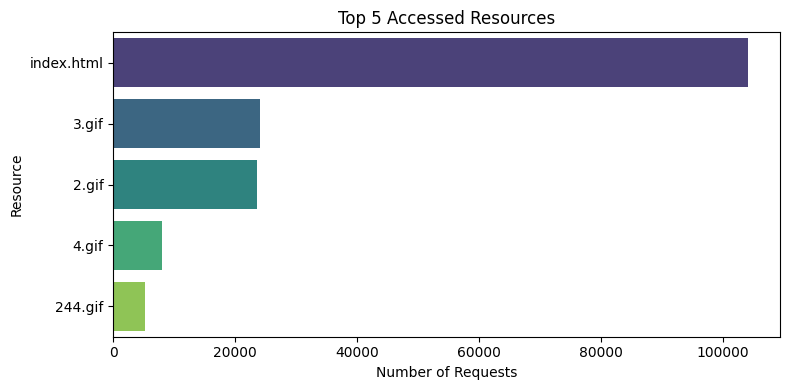

In [ ]:
top_resources = df['resource'].value_counts().head(5)
print("Top 5 Resources Accessed:\n", top_resources)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_resources.values, y=top_resources.index, palette="viridis")
plt.title("Top 5 Accessed Resources")
plt.xlabel("Number of Requests")
plt.ylabel("Resource")
plt.tight_layout()
plt.show()


# 🔹 2. Traffic Volume Over Time
Understand how traffic varies — hourly, daily, etc.This reveals peak traffic windows — ideal for load balancing or marketing timing decisions. For example, traffic spikes at 1-3 PM.


<ipython-input-28-a26d193cb98b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['timestamp'].dt.hour


Hourly Traffic:
 hour
0     10694
1      9144
2      8725
3      7486
4      7365
5      7813
6      9258
7     11178
8     16128
9     19882
10    23775
11    26395
12    24748
13    27658
14    27276
15    25956
16    25866
17    21427
18    16384
19    15988
20    16014
21    14670
22    13422
23    12597
dtype: int64


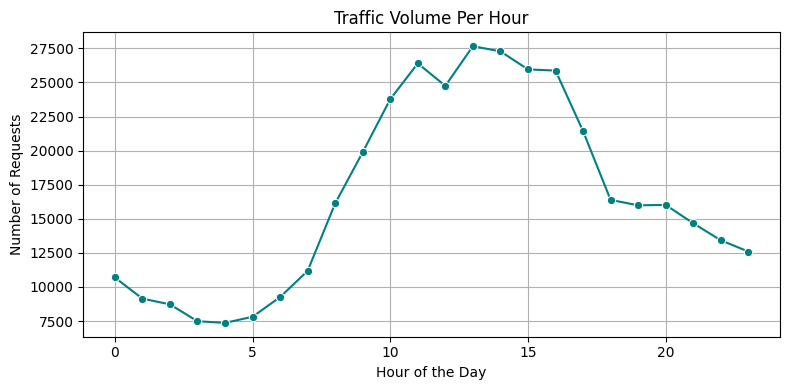

In [ ]:
# ✅ Generalized and error-resilient datetime parsing
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce')

# ✅ Drop rows where timestamp couldn't be parsed
df = df.dropna(subset=['timestamp'])

# ✅ Now safely extract hour (only valid datetime rows remain)
df['hour'] = df['timestamp'].dt.hour

# ✅ Group and count requests by hour
hourly_traffic = df.groupby('hour').size()

# ✅ Print the results
print("Hourly Traffic:\n", hourly_traffic)

# ✅ Plotting
plt.figure(figsize=(8, 4))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker='o', color='teal')
plt.title("Traffic Volume Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔹 3. Client Type Analysis
How much traffic comes from local vs remote users.Knowing traffic source helps understand internal vs external demand. High remote traffic might suggest developer/testing activity.



Client Type Distribution:
 host
remote    239701
local     160148
Name: count, dtype: int64


<ipython-input-30-f6e93862727b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=client_distribution.index, y=client_distribution.values, palette='pastel')


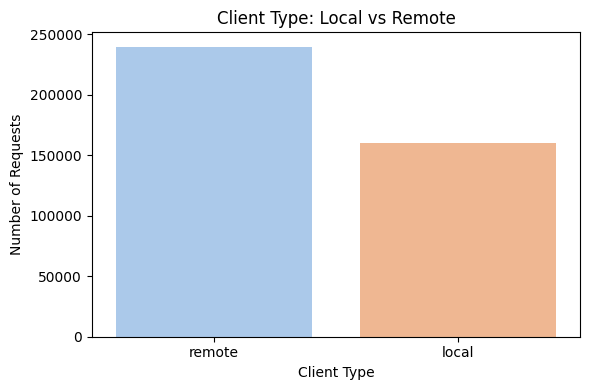

In [ ]:
client_distribution = df['host'].value_counts()
print("Client Type Distribution:\n", client_distribution)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=client_distribution.index, y=client_distribution.values, palette='pastel')
plt.title("Client Type: Local vs Remote")
plt.xlabel("Client Type")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


# 🔹 4. Status Code Distribution
Analyze HTTP status codes (200,302, etc.).Track how many requests succeed, redirect, or fail. A spike in 200 suggests Sucess links or outdated resources.




Status Code Counts:
 status
200    328951
304     70317
302       573
500         8
Name: count, dtype: int64


<ipython-input-31-f186ceed8f4b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index.astype(str), y=status_counts.values, palette='Set2')


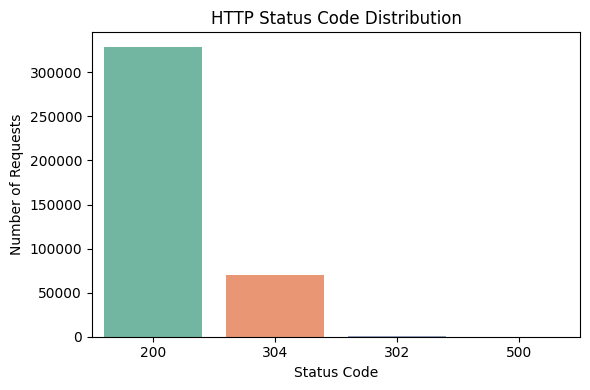

In [ ]:
status_counts = df['status'].value_counts()
print("Status Code Counts:\n", status_counts)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index.astype(str), y=status_counts.values, palette='Set2')
plt.title("HTTP Status Code Distribution")
plt.xlabel("Status Code")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()


#🔹 5. Bytes Transferred Stats
Understand size of data being sent to users.Helps detect if large files are requested frequently — useful for performance optimization or compression decisions.




Bytes Transferred Stats:
 count    3.998490e+05
mean     1.158054e+04
std      9.075174e+04
min      0.000000e+00
25%      4.410000e+02
50%      1.738000e+03
75%      6.624000e+03
max      7.492990e+06
Name: size, dtype: float64


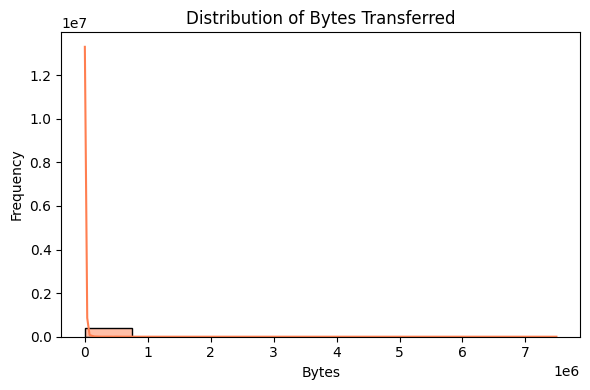

In [ ]:
bytes_summary = df['size'].describe()
print("Bytes Transferred Stats:\n", bytes_summary)

# Plot
plt.figure(figsize=(6, 4))
sns.histplot(df['size'], bins=10, kde=True, color='coral')
plt.title("Distribution of Bytes Transferred")
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# 🔹 6. Peak Traffic Windows
Identify when the server was busiest (at finest granularity).Pinpointing exact moments of load helps in server scaling or downtime prevention — essential for production systems.




In [ ]:
df['minute'] = df['timestamp'].dt.floor('T')  # Round to minute
traffic_minute = df.groupby('minute').size()

peak_minute = traffic_minute.idxmax()
peak_count = traffic_minute.max()

print(f"Peak Traffic: {peak_count} requests at {peak_minute}")


Peak Traffic: 81 requests at 1995-06-25 17:07:00-06:00


<ipython-input-34-6a903df34916>:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['minute'] = df['timestamp'].dt.floor('T')  # Round to minute
<ipython-input-34-6a903df34916>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'] = df['timestamp'].dt.floor('T')  # Round to minute


In [ ]:
df.head(3)

,host,timestamp,method,resource,protocol,status,size,hour,minute
0,local,1994-10-24 13:41:41-06:00,GET,index.html,HTTP/1.0,200,150,13,1994-10-24 13:41:00-06:00
1,local,1994-10-24 13:41:41-06:00,GET,1.gif,HTTP/1.0,200,1210,13,1994-10-24 13:41:00-06:00
2,local,1994-10-24 13:43:13-06:00,GET,index.html,HTTP/1.0,200,3185,13,1994-10-24 13:43:00-06:00


# 🔹 7. Session Duration and Inter-arrival Time Distribution
Measure how long users stay active (session duration) and how frequently they make requests (inter-arrival time). This gives insight into user engagement and site stickiness.


Inter-arrival time stats (seconds):
count    3.998470e+05
mean     1.521280e+02
std      2.979442e+04
min      0.000000e+00
25%      1.000000e+00
50%      5.000000e+00
75%      2.900000e+01
max      1.332783e+07
Name: inter_arrival_sec, dtype: float64


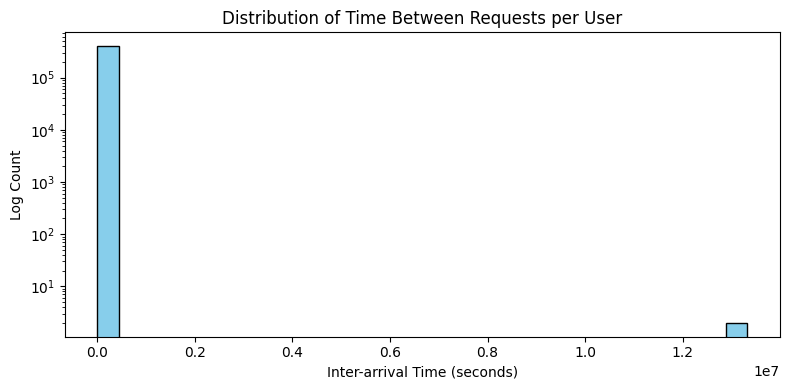

In [ ]:
import numpy as np

# Assume data is sorted by host and timestamp
df = df.sort_values(['host', 'timestamp'])

# Calculate time difference (in seconds) between consecutive requests per host
df['prev_timestamp'] = df.groupby('host')['timestamp'].shift(1)
df['inter_arrival_sec'] = (df['timestamp'] - df['prev_timestamp']).dt.total_seconds()

# Filter out first request per host (NaN inter-arrival)
inter_arrival_times = df['inter_arrival_sec'].dropna()

# Summary statistics and distribution fitting
print("Inter-arrival time stats (seconds):")
print(inter_arrival_times.describe())

# Plot histogram with log scale (common for inter-arrival times)
plt.figure(figsize=(8,4))
plt.hist(inter_arrival_times, bins=30, log=True, color='skyblue', edgecolor='black')
plt.xlabel('Inter-arrival Time (seconds)')
plt.ylabel('Log Count')
plt.title('Distribution of Time Between Requests per User')
plt.tight_layout()
plt.show()


# 🔹8. Resource Transition Probability Matrix (Markov Chain)

Model the likelihood users navigate from one resource (page) to another, revealing common paths or bottlenecks in site navigation.


Sample Resource Transition Probabilities:
next_resource  1.gif   10.html  100.xbm  1000.jpg  10000.gif  10001.gif  \
resource                                                                  
1.gif            0.0  0.000000  0.00000       0.0        0.0        0.0   
10.html          0.0  0.000000  0.00565       0.0        0.0        0.0   
100.xbm          0.0  0.053777  0.00128       0.0        0.0        0.0   
1000.jpg         0.0  0.000000  0.00000       0.0        0.0        0.0   
10000.gif        0.0  0.000000  0.00000       0.0        0.0        1.0   

next_resource  10002.gif  10003.gif  10004.gif  10005.html  ...  9991.html/  \
resource                                                    ...               
1.gif                0.0        0.0        0.0         0.0  ...         0.0   
10.html              0.0        0.0        0.0         0.0  ...         0.0   
100.xbm              0.0        0.0        0.0         0.0  ...         0.0   
1000.jpg             0.0        0.0  

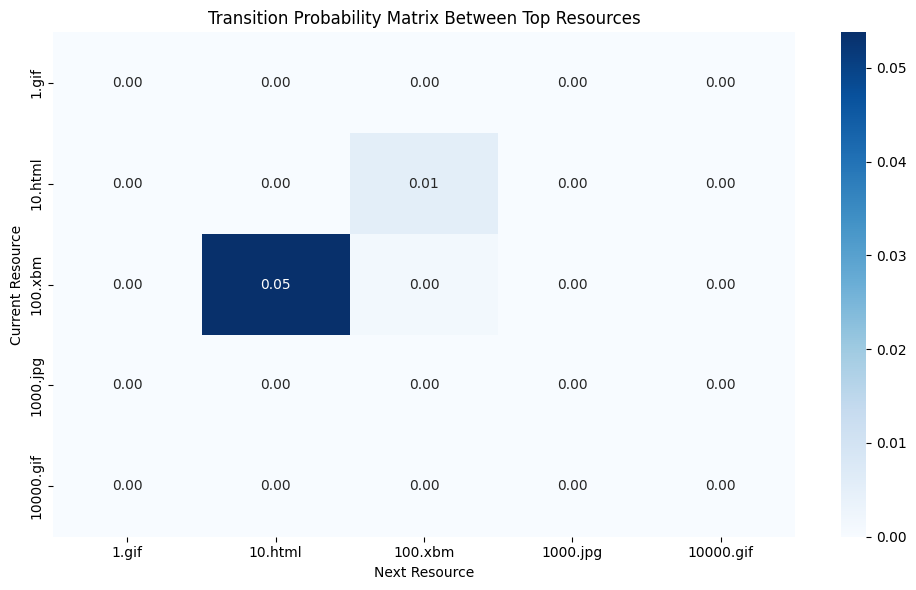

In [ ]:
# Extract sequences of resources visited by each user
df_sorted = df.sort_values(['host', 'timestamp'])
df_sorted['next_resource'] = df_sorted.groupby('host')['resource'].shift(-1)

# Drop rows where next_resource is NaN (end of session)
transitions = df_sorted.dropna(subset=['next_resource'])

# Count transitions
transition_counts = transitions.groupby(['resource', 'next_resource']).size().unstack(fill_value=0)

# Normalize to probabilities (rows sum to 1)
transition_prob = transition_counts.div(transition_counts.sum(axis=1), axis=0)

print("Sample Resource Transition Probabilities:")
print(transition_prob.head())

# Heatmap plot for top resources
top_resources = transition_prob.index[:5]
plt.figure(figsize=(10,6))
sns.heatmap(transition_prob.loc[top_resources, top_resources], annot=True, cmap='Blues', fmt='.2f')
plt.title('Transition Probability Matrix Between Top Resources')
plt.xlabel('Next Resource')
plt.ylabel('Current Resource')
plt.tight_layout()
plt.show()


# 🔹9. Anomaly Detection in Traffic Patterns (Z-score based)
Detect unusual spikes or drops in traffic or bytes transferred that may indicate incidents, attacks, or successful campaigns.


Traffic anomalies detected (hours with unusual traffic):
Series([], dtype: float64)


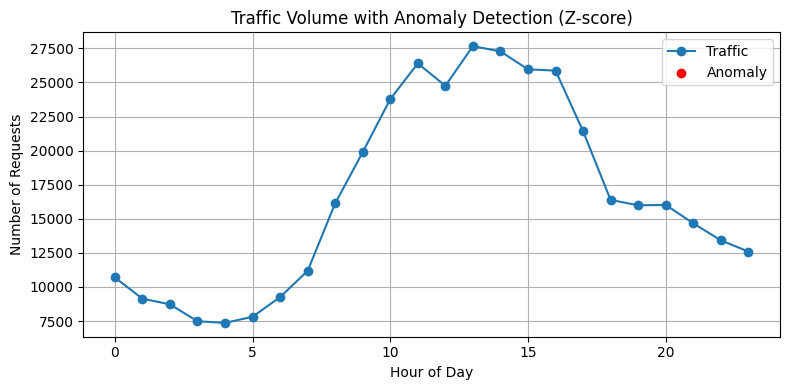

In [ ]:
# Aggregate traffic volume per hour
hourly_traffic = df.groupby('hour').size()

# Calculate Z-scores (number of std deviations from mean)
traffic_mean = hourly_traffic.mean()
traffic_std = hourly_traffic.std()
hourly_traffic_z = (hourly_traffic - traffic_mean) / traffic_std

# Identify anomalies (Z-score > 2 or < -2)
anomalies = hourly_traffic_z[abs(hourly_traffic_z) > 2]

print("Traffic anomalies detected (hours with unusual traffic):")
print(anomalies)

# Plot with anomalies highlighted
plt.figure(figsize=(8,4))
plt.plot(hourly_traffic.index, hourly_traffic.values, marker='o', label='Traffic')
plt.scatter(anomalies.index, hourly_traffic.loc[anomalies.index], color='red', label='Anomaly')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.title('Traffic Volume with Anomaly Detection (Z-score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 10. 🔹 Bytes Transferred: Pareto Principle Check (80-20 Rule)
Check if a small fraction of resources or users are responsible for most bytes transferred. This helps prioritize infrastructure or content focus.


Resources contributing to 80% of bytes transferred: 317
Top resources by bytes transferred:
resource
3.gif         339928481
11130.rgb     179639191
index.html    172079920
743.qt        114350565
244.gif       113098151
Name: size, dtype: int64


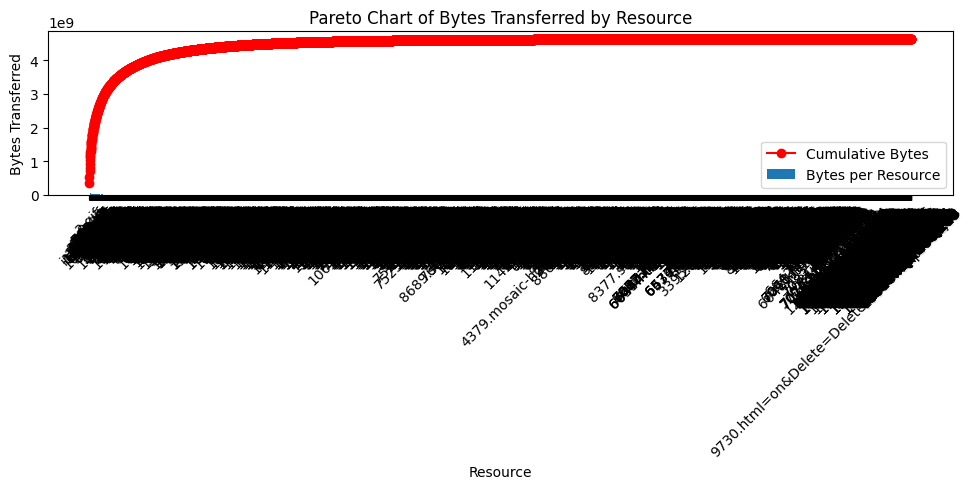

In [ ]:
# Calculate total bytes transferred per resource
bytes_per_resource = df.groupby('resource')['size'].sum().sort_values(ascending=False)

# Cumulative sum and cumulative percentage
cumulative_bytes = bytes_per_resource.cumsum()
total_bytes = bytes_per_resource.sum()
cumulative_pct = cumulative_bytes / total_bytes

# Find the minimal number of resources accounting for 80% of bytes
resources_80pct = cumulative_pct[cumulative_pct <= 0.8].count()

print(f"Resources contributing to 80% of bytes transferred: {resources_80pct}")
print("Top resources by bytes transferred:")
print(bytes_per_resource.head())

# Plot Pareto chart
plt.figure(figsize=(10,5))
plt.bar(bytes_per_resource.index, bytes_per_resource.values, label='Bytes per Resource')
plt.plot(cumulative_pct.index, cumulative_pct.values * total_bytes, color='red', marker='o', label='Cumulative Bytes')
plt.xticks(rotation=45)
plt.xlabel('Resource')
plt.ylabel('Bytes Transferred')
plt.title('Pareto Chart of Bytes Transferred by Resource')
plt.legend()
plt.tight_layout()
plt.show()


# 🔹 10.Statistical Correlation Between Request Size and Status Code
Check if larger or smaller requests tend to fail more often, which could indicate bottlenecks or bugs.


Correlation between request size and success: 0.059


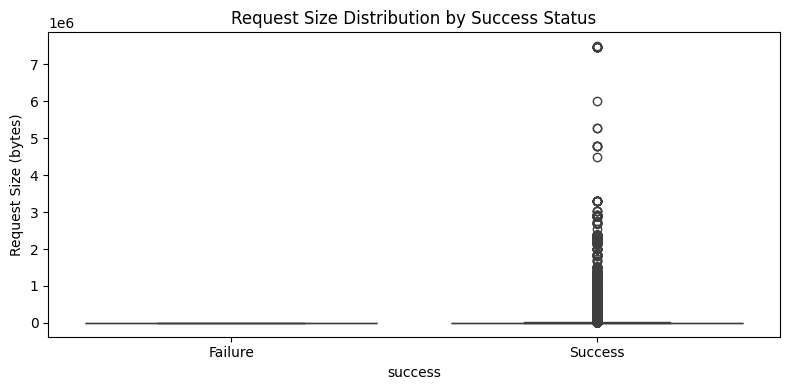

In [ ]:
# Convert status to success/failure binary: 1 = success (2xx), 0 = failure (others)
df['success'] = df['status'].apply(lambda x: 1 if 200 <= x < 300 else 0)

# Compute correlation
correlation = df['size'].corr(df['success'])

print(f"Correlation between request size and success: {correlation:.3f}")

# Plot sizes by success/failure
plt.figure(figsize=(8,4))
sns.boxplot(x='success', y='size', data=df)
plt.xticks([0, 1], ['Failure', 'Success'])
plt.ylabel('Request Size (bytes)')
plt.title('Request Size Distribution by Success Status')
plt.tight_layout()
plt.show()


# 🔹 11.Client Type Temporal Usage Distribution (Hypothesis Testing)
Test statistically if local and remote clients access the site at different hours, which may inform marketing segmentation.

In [ ]:
from scipy.stats import ks_2samp

# Extract hourly distributions per client type
local_hours = df[df['host'] == 'local']['hour']
remote_hours = df[df['host'] == 'remote']['hour']

# Kolmogorov-Smirnov test for distribution difference
ks_stat, p_value = ks_2samp(local_hours, remote_hours)

print(f"KS Test Statistic: {ks_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Significant difference in hourly access patterns between local and remote clients.")
else:
    print("No significant difference in hourly access patterns between client types.")


KS Test Statistic: 0.125
P-value: 0.000
Significant difference in hourly access patterns between local and remote clients.


# 🔹 12.Predictive Model: Poisson Regression on Request Count by Hour
Model and predict hourly traffic counts (which are counts data) using a Poisson regression, useful for capacity planning

                 Generalized Linear Model Regression Results                  
Dep. Variable:               requests   No. Observations:                   24
Model:                            GLM   Df Residuals:                       21
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9444.8
Date:                Sun, 08 Jun 2025   Deviance:                       18614.
Time:                        19:19:28   Pearson chi2:                 1.93e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.5414      0.006   1369.029   

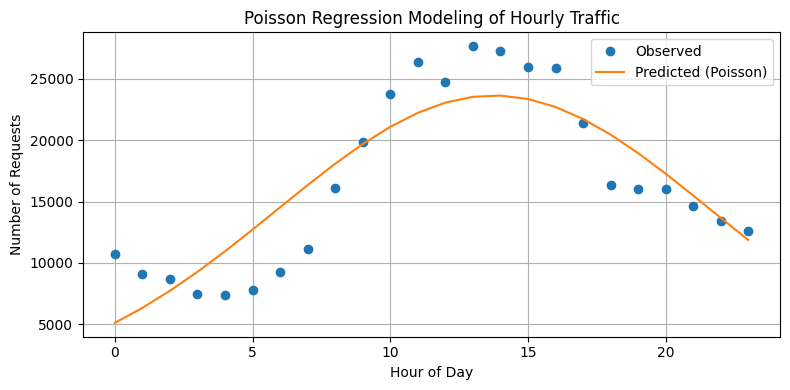

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Aggregate requests by hour
hourly_counts = df.groupby('hour').size().reset_index(name='requests')

# Add polynomial terms for hour to capture trend/non-linearity
hourly_counts['hour_squared'] = hourly_counts['hour'] ** 2

# Fit Poisson regression: requests ~ hour + hour^2
model = smf.glm(formula='requests ~ hour + hour_squared', data=hourly_counts, family=sm.families.Poisson()).fit()

print(model.summary())

# Predict and plot
hourly_counts['predicted'] = model.predict(hourly_counts)

plt.figure(figsize=(8,4))
plt.plot(hourly_counts['hour'], hourly_counts['requests'], 'o', label='Observed')
plt.plot(hourly_counts['hour'], hourly_counts['predicted'], '-', label='Predicted (Poisson)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.title('Poisson Regression Modeling of Hourly Traffic')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
